In [2]:
import numpy as np
import h5py
from sklearn.model_selection import train_test_split

In [8]:
# Set your parameters
hdf_file = '/glade/derecho/scratch/joko/synth-ros/params_200_50_20250403/imgs-ml-ready/default.h5'
batch_size = 128
targets = ['n_arms', 'filenames']  # Replace with your actual target column name
random_state = 666

# specify train/val/test indices using sklearn
indices = list(range(7_000_000))
train_idx, temp_idx = train_test_split(indices, test_size=0.30, random_state=random_state)
val_idx, test_idx = train_test_split(temp_idx, test_size=0.50, random_state=random_state)
subset_size = 0.01  # subset percentage

def get_random_subset(indices, subset_size, random_state):
    """
    Get a random subset of indices.
    
    Parameters:
    - indices: list of indices to choose from
    - subset_size: percentage of the subset size
    - random_state: seed for reproducibility
    
    Returns:
    - Randomly selected subset of indices
    """
    if subset_size <= 0 or subset_size > 1:
        raise ValueError("subset_size must be between 0 and 1")
    
    # Ensure the random state is set for reproducibility
    rng = np.random.default_rng(random_state)
    subset_count = max(1, int(len(indices) * subset_size))
    indices = rng.choice(indices, size=subset_count, replace=False)
    indices = np.sort(indices)
    return indices

train_idx = get_random_subset(train_idx, subset_size, random_state)
val_idx = get_random_subset(val_idx, subset_size, random_state)
test_idx = get_random_subset(test_idx, subset_size, random_state)

# load the n_arms and filenames from the hdf5 file
with h5py.File(hdf_file, 'r') as f:
    n_arms = f['n_arms'][train_idx]
    filenames = f['filenames'][train_idx]

In [9]:
print(len(n_arms))
print(len(filenames))

49000
49000


Text(0.5, 0, 'n_arms')

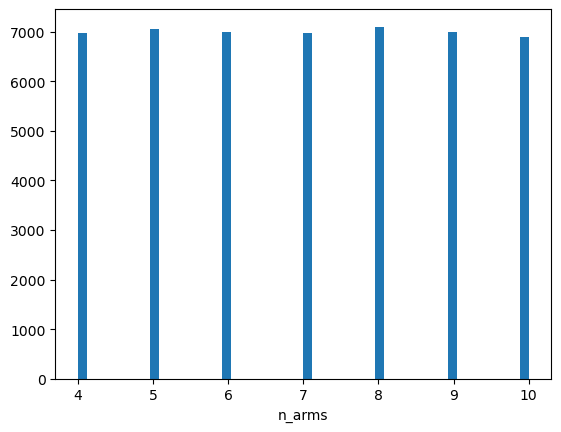

In [11]:
# plot histograms of n_arms
import matplotlib.pyplot as plt
plt.hist(n_arms, bins=50)
plt.xlabel('n_arms')    

In [19]:
# convert filenames from bytes to string
filenames_str = [filename.decode('utf-8') for filename in filenames]
# create dataframe
import pandas as pd
df = pd.DataFrame({'n_arms': n_arms, 'filenames': filenames_str})
# extraction id (e.g., 069913) and projection id (e.g., 002)
split_cols = df['filenames'].str.split('-', expand=True)
df['particle_id'] = split_cols[2]
df['projection_id'] = split_cols[3]

In [20]:
df.head()

,n_arms,filenames,particle_id,projection_id
0,10.0,ros-projection-069913-002-default.png,069913,002
1,10.0,ros-projection-065100-027-default.png,065100,027
2,10.0,ros-projection-068542-062-default.png,068542,062
3,10.0,ros-projection-066315-050-default.png,066315,050
4,10.0,ros-projection-063371-033-default.png,063371,033


In [22]:
particle_id_counts = df['particle_id'].value_counts()
# get statistics of the particle_id counts
particle_id_counts.describe()

count    35225.000000
mean         1.391057
std          0.654224
min          1.000000
25%          1.000000
50%          1.000000
75%          2.000000
max          6.000000
Name: count, dtype: float64

In [23]:
# get number of unique particle_ids as integers 
unique_particle_ids = df['particle_id'].unique()
unique_particle_ids = [int(p_id) for p_id in unique_particle_ids]
print(len(unique_particle_ids))

35225


In [24]:
# load the n_arms and filenames from the hdf5 file
with h5py.File(hdf_file, 'r') as f:
    n_arms = f['n_arms'][test_idx]
    filenames = f['filenames'][test_idx]

In [25]:
print(len(n_arms))
print(len(filenames))

10500
10500


Text(0.5, 0, 'n_arms')

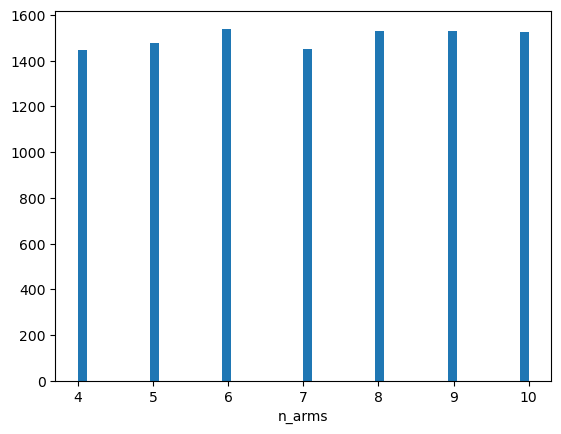

In [26]:
# plot histograms of n_arms
import matplotlib.pyplot as plt
plt.hist(n_arms, bins=50)
plt.xlabel('n_arms')    

In [27]:
# convert filenames from bytes to string
filenames_str = [filename.decode('utf-8') for filename in filenames]
# create dataframe
import pandas as pd
df = pd.DataFrame({'n_arms': n_arms, 'filenames': filenames_str})
# extraction id (e.g., 069913) and projection id (e.g., 002)
split_cols = df['filenames'].str.split('-', expand=True)
df['particle_id'] = split_cols[2]
df['projection_id'] = split_cols[3]

In [28]:
particle_id_counts = df['particle_id'].value_counts()
# get statistics of the particle_id counts
particle_id_counts.describe()

count    9766.000000
mean        1.075159
std         0.277660
min         1.000000
25%         1.000000
50%         1.000000
75%         1.000000
max         4.000000
Name: count, dtype: float64

In [29]:
# get number of unique particle_ids as integers 
unique_particle_ids = df['particle_id'].unique()
unique_particle_ids = [int(p_id) for p_id in unique_particle_ids]
print(len(unique_particle_ids))

9766
